In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
from IPython import display

In [2]:
%matplotlib inline

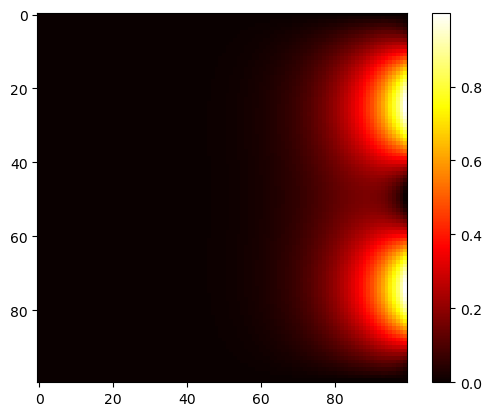

In [53]:
L = 100
H = 100
dx = 1
u = np.zeros((int(L/dx),int(H/dx)))
alpha = 0.1
fig, ax = plt.subplots()
iteration = 0
cmap = 'hot'

# BCs
u[:,0] = 1
u[:,-1] = 1
u[0,:] = 0
u[-1,:] = 0

# other BCs
u[:,-1] = np.sin(2*np.pi*np.linspace(0,L,num=int(L/dx))/H)**2
u[:,0] = 0


# Initial state
im=ax.imshow(u,cmap=cmap)
cbar = fig.colorbar(im, orientation='vertical')
display.display(fig)

while iteration < 2000:
    iteration += 1
    if iteration % 100 == 0:
        cbar.remove()
        display.clear_output(wait=True)
        im=ax.imshow(u,cmap=cmap)
        cbar = fig.colorbar(im, orientation='vertical')
        display.display(fig)
        
    Lu = sp.ndimage.laplace(u)
    u[1:-1, 1:-1] = u[1:-1, 1:-1] + alpha * dx*Lu[1:-1, 1:-1]

display.clear_output(wait=True)